<table align="left">
  <td>
    <a href="https://colab.research.google.com/drive/1Bb44nmvjN7fZwrRYMOA7fOSvfCTZaNI0" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

In [ ]:
!pip install ipython-autotime
%load_ext autotime

time: 7.7 ms (started: 2025-09-30 10:34:32 +02:00)


# **Clasificación binaria**

In [9]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

# Cargar el conjunto de datos
data = load_breast_cancer()
X, y = data.data, data.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Dataset
Puedes consultar los datos de este dataset y otros datasets de ejemplo en la [página](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html)

In [11]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

## Regresión logística

In [5]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo de regresión logística
model = LogisticRegression(max_iter=5000) #probar con 10000

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva


In [6]:
# Evaluar el modelo
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')
print(f'ROC AUC: {roc_auc_score(y_test, y_pred_proba)}')

# Obtener y mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Calcula la matriz de confusión
tn, fp, fn, tp = conf_matrix.ravel()

# Especificidad
specificity = tn / (tn + fp)
print(f'Specificity: {specificity}')

# Tasa de Falsos Positivos (FPR)
fpr = 1 - specificity
print(f'False Positive Rate: {fpr}')

# Valor Predictivo Negativo (NPV)
npv = tn / (tn + fn)
print(f'Negative Predictive Value: {npv}')

# Tasa de Falsos Negativos (FNR)
fnr = fn / (tp + fn)
print(f'False Negative Rate: {fnr}')

# Tasa de aciertos negativos (Negative Accuracy)
negative_accuracy = tn / (tn + fp)
print(f'Negative Accuracy: {negative_accuracy}')

# F1 Score para la clase negativa (se calcula de manera similar al F1 Score para la clase positiva)
f1_negative = 2 * (specificity * npv) / (specificity + npv)
print(f'F1 Score for Negative Class: {f1_negative}')


Accuracy: 0.956140350877193
Precision: 0.9459459459459459
Recall: 0.9859154929577465
F1 Score: 0.9655172413793104
ROC AUC: 0.9977071732721913
Specificity: 0.9069767441860465
False Positive Rate: 0.09302325581395354
Negative Predictive Value: 0.975
False Negative Rate: 0.014084507042253521
Negative Accuracy: 0.9069767441860465
F1 Score for Negative Class: 0.9397590361445783


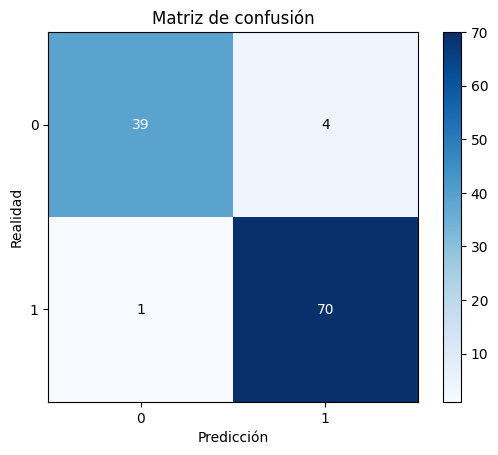

In [7]:
# Gráfico de la matriz de confusión
fig, ax = plt.subplots()
im = ax.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(conf_matrix.shape[1]),
       yticks=np.arange(conf_matrix.shape[0]),
       xticklabels=['0', '1'], yticklabels=['0', '1'],
       title='Matriz de confusión',
       ylabel='Realidad',
       xlabel='Predicción')

# Loop over data dimensions and create text annotations.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(j, i, format(conf_matrix[i, j], 'd'),
                ha="center", va="center",
                color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.show()


/home/roberto/.virtualenvs/transformers/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 10 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/roberto/.virtualenvs/transformers/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 10 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10).
You might also want to scale the data as shown in:
    https://scikit-learn.org/

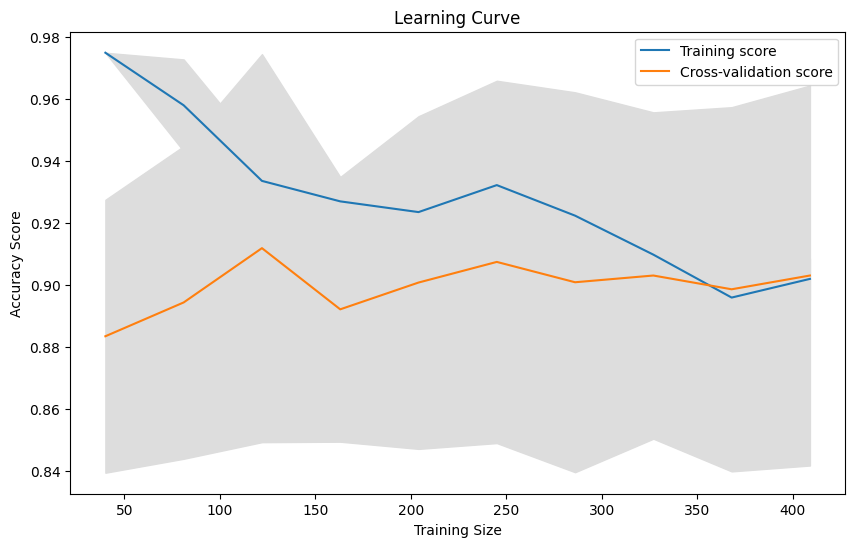

In [5]:
# Calcular las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Calcular las medias y las desviaciones estándar del rendimiento del entrenamiento y del conjunto de prueba
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Dibujar las curvas
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='#DDDDDD')

# Títulos y etiquetas
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')

# Mostrar la gráfica
plt.show()

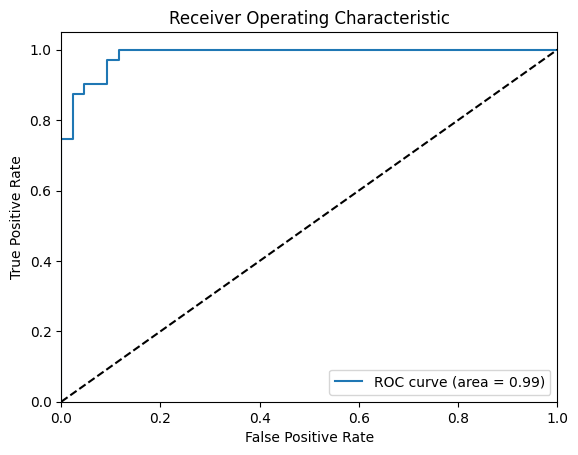

In [6]:
# Graficar la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_proba))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Arboles de decisión

In [7]:
from sklearn.tree import DecisionTreeClassifier

# Crear y entrenar el modelo de árbol de decisión
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva


In [8]:
# Evaluar el modelo
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')
print(f'ROC AUC: {roc_auc_score(y_test, y_pred_proba)}')

# Obtener y mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Calcula la matriz de confusión
tn, fp, fn, tp = conf_matrix.ravel()

# Especificidad
specificity = tn / (tn + fp)
print(f'Specificity: {specificity}')

# Tasa de Falsos Positivos (FPR)
fpr = 1 - specificity
print(f'False Positive Rate: {fpr}')

# Valor Predictivo Negativo (NPV)
npv = tn / (tn + fn)
print(f'Negative Predictive Value: {npv}')

# Tasa de Falsos Negativos (FNR)
fnr = fn / (tp + fn)
print(f'False Negative Rate: {fnr}')

# Tasa de aciertos negativos (Negative Accuracy)
negative_accuracy = tn / (tn + fp)
print(f'Negative Accuracy: {negative_accuracy}')

# F1 Score para la clase negativa (se calcula de manera similar al F1 Score para la clase positiva)
f1_negative = 2 * (specificity * npv) / (specificity + npv)
print(f'F1 Score for Negative Class: {f1_negative}')


Accuracy: 0.9473684210526315
Precision: 0.9577464788732394
Recall: 0.9577464788732394
F1 Score: 0.9577464788732394
ROC AUC: 0.9439895185063871
Specificity: 0.9302325581395349
False Positive Rate: 0.06976744186046513
Negative Predictive Value: 0.9302325581395349
False Negative Rate: 0.04225352112676056
Negative Accuracy: 0.9302325581395349
F1 Score for Negative Class: 0.9302325581395349


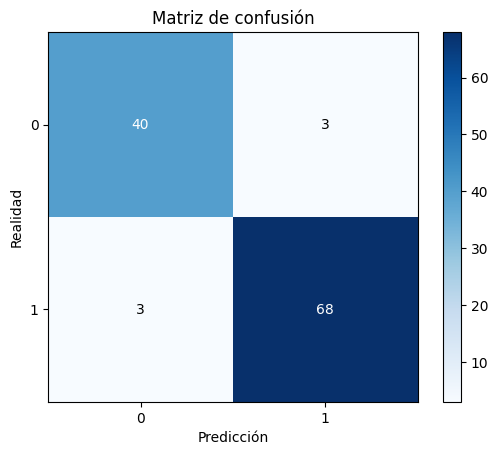

In [9]:
# Gráfico de la matriz de confusión
fig, ax = plt.subplots()
im = ax.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(conf_matrix.shape[1]),
       yticks=np.arange(conf_matrix.shape[0]),
       xticklabels=['0', '1'], yticklabels=['0', '1'],
       title='Matriz de confusión',
       ylabel='Realidad',
       xlabel='Predicción')

# Loop over data dimensions and create text annotations.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(j, i, format(conf_matrix[i, j], 'd'),
                ha="center", va="center",
                color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.show()

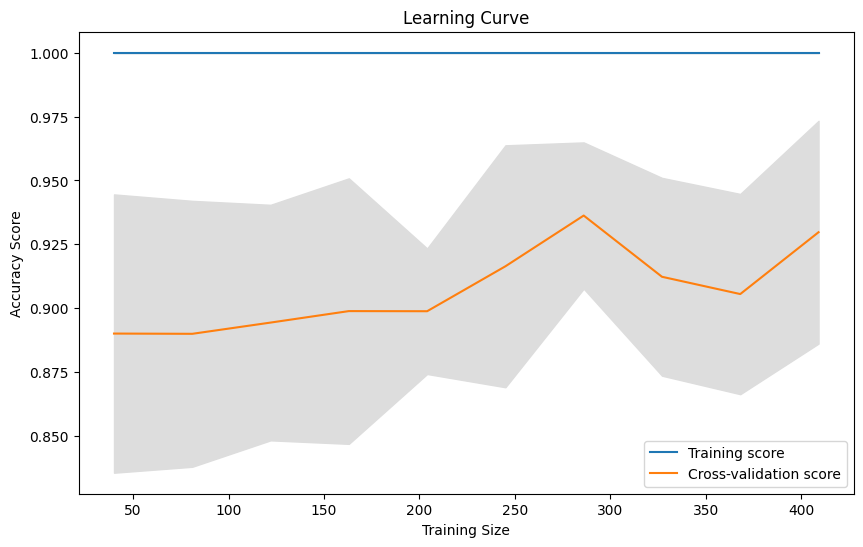

In [10]:
# Calcular las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Calcular las medias y las desviaciones estándar del rendimiento del entrenamiento y del conjunto de prueba
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Dibujar las curvas
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='#DDDDDD')

# Títulos y etiquetas
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')

# Mostrar la gráfica
plt.show()


## Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Crear el modelo de Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
clf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva


In [12]:
# Evaluar el modelo
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')
print(f'ROC AUC: {roc_auc_score(y_test, y_pred_proba)}')

# Obtener y mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Calcula la matriz de confusión
tn, fp, fn, tp = conf_matrix.ravel()

# Especificidad
specificity = tn / (tn + fp)
print(f'Specificity: {specificity}')

# Tasa de Falsos Positivos (FPR)
fpr = 1 - specificity
print(f'False Positive Rate: {fpr}')

# Valor Predictivo Negativo (NPV)
npv = tn / (tn + fn)
print(f'Negative Predictive Value: {npv}')

# Tasa de Falsos Negativos (FNR)
fnr = fn / (tp + fn)
print(f'False Negative Rate: {fnr}')

# Tasa de aciertos negativos (Negative Accuracy)
negative_accuracy = tn / (tn + fp)
print(f'Negative Accuracy: {negative_accuracy}')

# F1 Score para la clase negativa (se calcula de manera similar al F1 Score para la clase positiva)
f1_negative = 2 * (specificity * npv) / (specificity + npv)
print(f'F1 Score for Negative Class: {f1_negative}')


Accuracy: 0.9649122807017544
Precision: 0.958904109589041
Recall: 0.9859154929577465
F1 Score: 0.9722222222222222
ROC AUC: 0.9952505732066819
Specificity: 0.9302325581395349
False Positive Rate: 0.06976744186046513
Negative Predictive Value: 0.975609756097561
False Negative Rate: 0.014084507042253521
Negative Accuracy: 0.9302325581395349
F1 Score for Negative Class: 0.9523809523809524


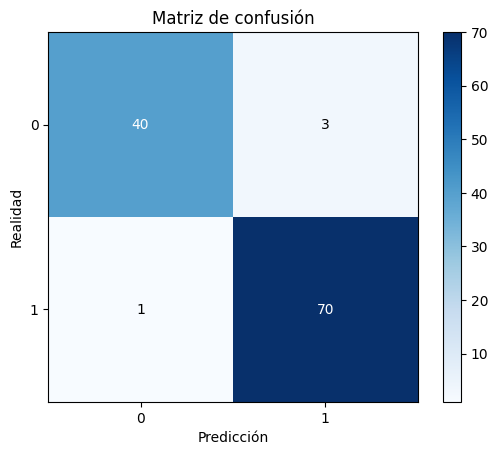

In [13]:
# Gráfico de la matriz de confusión
fig, ax = plt.subplots()
im = ax.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(conf_matrix.shape[1]),
       yticks=np.arange(conf_matrix.shape[0]),
       xticklabels=['0', '1'], yticklabels=['0', '1'],
       title='Matriz de confusión',
       ylabel='Realidad',
       xlabel='Predicción')

# Loop over data dimensions and create text annotations.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(j, i, format(conf_matrix[i, j], 'd'),
                ha="center", va="center",
                color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.show()

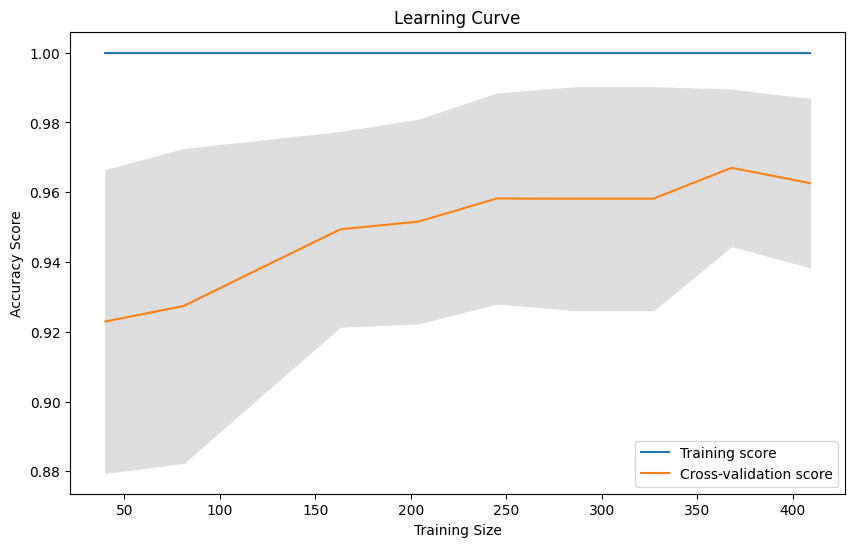

In [14]:
# Calcular las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Calcular las medias y las desviaciones estándar del rendimiento del entrenamiento y del conjunto de prueba
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Dibujar las curvas
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='#DDDDDD')

# Títulos y etiquetas
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')

# Mostrar la gráfica
plt.show()


## XGBOOST

In [15]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Definir el modelo XGBoost
clf = XGBClassifier()

# Definir los hiperparámetros y sus posibles valores
'''
param_grid = {
    'n_estimators': [50, 75, 100, 125, 150, 175, 200],
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'max_depth': [2, 3, 4, 5, 6],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4]
}
'''
param_grid = {
    'n_estimators': [50, 75],
    'learning_rate': [0.001, 0.01],
    'max_depth': [2, 3],
    'subsample': [0.6, 0.7],
    'colsample_bytree': [0.6, 0.7],
    'gamma': [0, 0.1]
}
# Configurar la búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(clf, param_grid, cv=3, scoring='accuracy')

# Realizar la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print(f"Mejores hiperparámetros: {grid_search.best_params_}")

# Mostrar la mejor puntuación (exactitud) alcanzada con los mejores hiperparámetros
print(f"Mejor puntuación: {grid_search.best_score_}")


Mejores hiperparámetros: {'colsample_bytree': 0.7, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 75, 'subsample': 0.7}
Mejor puntuación: 0.9538021377948183


In [16]:
# Recuperar el mejor modelo XGBoost
clf = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva


In [17]:
# Evaluar el modelo
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')
print(f'ROC AUC: {roc_auc_score(y_test, y_pred_proba)}')

# Obtener y mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Calcula la matriz de confusión
tn, fp, fn, tp = conf_matrix.ravel()

# Especificidad
specificity = tn / (tn + fp)
print(f'Specificity: {specificity}')

# Tasa de Falsos Positivos (FPR)
fpr = 1 - specificity
print(f'False Positive Rate: {fpr}')

# Valor Predictivo Negativo (NPV)
npv = tn / (tn + fn)
print(f'Negative Predictive Value: {npv}')

# Tasa de Falsos Negativos (FNR)
fnr = fn / (tp + fn)
print(f'False Negative Rate: {fnr}')

# Tasa de aciertos negativos (Negative Accuracy)
negative_accuracy = tn / (tn + fp)
print(f'Negative Accuracy: {negative_accuracy}')

# F1 Score para la clase negativa (se calcula de manera similar al F1 Score para la clase positiva)
f1_negative = 2 * (specificity * npv) / (specificity + npv)
print(f'F1 Score for Negative Class: {f1_negative}')


Accuracy: 0.9649122807017544
Precision: 0.958904109589041
Recall: 0.9859154929577465
F1 Score: 0.9722222222222222
ROC AUC: 0.9934490664919751
Specificity: 0.9302325581395349
False Positive Rate: 0.06976744186046513
Negative Predictive Value: 0.975609756097561
False Negative Rate: 0.014084507042253521
Negative Accuracy: 0.9302325581395349
F1 Score for Negative Class: 0.9523809523809524


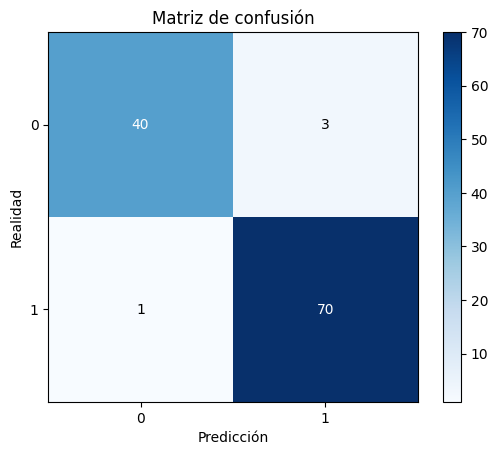

In [18]:
# Gráfico de la matriz de confusión
fig, ax = plt.subplots()
im = ax.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(conf_matrix.shape[1]),
       yticks=np.arange(conf_matrix.shape[0]),
       xticklabels=['0', '1'], yticklabels=['0', '1'],
       title='Matriz de confusión',
       ylabel='Realidad',
       xlabel='Predicción')

# Loop over data dimensions and create text annotations.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(j, i, format(conf_matrix[i, j], 'd'),
                ha="center", va="center",
                color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.show()

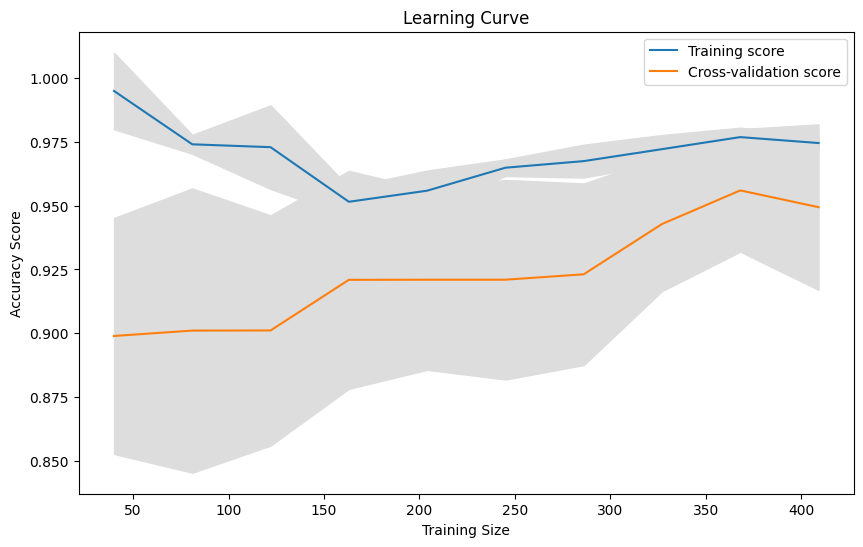

In [19]:
# Calcular las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Calcular las medias y las desviaciones estándar del rendimiento del entrenamiento y del conjunto de prueba
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Dibujar las curvas
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='#DDDDDD')

# Títulos y etiquetas
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')

# Mostrar la gráfica
plt.show()
